**Installation & Import**

In [18]:
pip install opencv-python numpy matplotlib selenium beautifulsoup4 scikit-learn pandas requests pillow keras tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
import cv2
import os
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import glob
import time
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import requests
from PIL import Image
from io import BytesIO
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.optimizers import SGD
import plotly.express as px

In [25]:
service = Service(executable_path=r"C:/Users/Dell/Desktop/chromedriver.exe")
options = webdriver.ChromeOptions()

In [51]:
def WebScraping(url,style,x_path):
    driver = webdriver.Chrome()
    driver.get(url)
    driver.implicitly_wait(10)
    scroll_pause_time = 1.5
    screen_height = driver.execute_script("return window.screen.height;")

    i = 0.7
    load_more_count = 0
    while True:
        driver.execute_script("window.scrollTo(0, {0});".format(screen_height * i))
        time.sleep(scroll_pause_time)
        if driver.execute_script("return (document.body.scrollHeight - window.scrollY) <= window.screen.height;"):
            try:
                load_more_button = driver.find_element("xpath", x_path)
                load_more_button.click()
                load_more_count += 1
                time.sleep(3)  # Adjust this delay after clicking "Load More"
                if load_more_count >= 26:  # Click the "Load More" button 3 times
                    break
            except:
                break
        i += 1

    page_source = driver.page_source
    driver.quit()
    
    soup = BeautifulSoup(page_source, 'html.parser')
    li_elements = soup.find_all('li', class_='ng-scope')
    image_urls = []
    for li in li_elements:
        img_tag = li.find('img', class_='ng-isolate-scope')
        if img_tag and img_tag.has_attr('src'):
            image_urls.append(img_tag['src'])

    artwork_elems = soup.find_all('a', class_='artwork-name')
    artist_elems = soup.find_all('a', class_='artist-name')
    year_elems = soup.find_all('span', class_='artwork-year')
    #style_elems = soup.find_all('div', class_='image-block-wrapper')  # Add this line to find style information

    artwork_names = [elem.text.strip() for elem in artwork_elems]
    artist_names = [elem.text.strip().split('•')[0].strip() for elem in artist_elems]  # Split to get only the artist name
    years = [elem.text.strip() for elem in year_elems]
# Extract the first style value
   # first_style = style_elems[0].find('img')['title'].split(':')[-1].strip()

    # Create a list of styles with the first style value repeated for each artwork
    styles = [style] * len(artwork_names)  # Repeat the first style value

    # Generate image IDs based on style numbering
    style_numbering = 1
    imageids = []
    for style in styles:
        imageid = f"{style}_{style_numbering}.jpg"
        imageids.append(imageid)
        style_numbering += 1

    data = {
        'ImageID': imageids,
        'Artwork Name': artwork_names,
        'Artist': artist_names,
        'Year': years,
        'Style': styles
    }

    # Create a DataFrame
    df = pd.DataFrame(data)


    return image_urls,df


In [27]:
def SaveItems(save_directory, image_urls, url,image_style):
    extracted_image_urls = image_urls
    if not os.path.exists(save_directory):
        os.makedirs(save_directory)
    for index, url in enumerate(extracted_image_urls):
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img = img.resize((100, 100))  # Resize the image
        img = img.convert('RGB')
        img.save(os.path.join(save_directory, f'{image_style}_{index}.jpg'))


In [28]:
def PaletteGeneration(save_directory):
    images = []
    for filename in os.listdir(save_directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(save_directory, filename)
            img = cv2.imread(img_path)

            if img is None:
                print(f"Error loading image: {img_path}")
            else:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (100, 100))
                images.append(img)

    pixel_data = np.vstack([img.reshape(-1, 3) for img in images])

    from sklearn.cluster import KMeans

    k = 5
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixel_data)
                
    dominant_colors = kmeans.cluster_centers_.astype(int)
    plt.imshow([dominant_colors], aspect='auto')
    plt.axis('off')
    plt.show()

**IMPRESSIONISM**

In [49]:
impressionsim_url = "https://www.wikiart.org/en/paintings-by-style/impressionism?select=featured#!#filterName:featured,viewType:masonry"
impressionsim = "C:/Users/arhar/OneDrive/Desktop/project_img/IMPRESSIONISM"
imagestyle='IMPRESSIONISM'
impressionsim_image_urls = []
x_path = "/html/body/div[2]/div[1]/section/main/div[3]/div/div/div[2]/a"
dfimp=pd.DataFrame()

In [52]:
impressionsim_image_urls,dfimp = WebScraping(impressionsim_url,imagestyle,x_path)
dfimp.shape

(1620, 5)

In [53]:
SaveItems(impressionsim, impressionsim_image_urls, impressionsim_url,imagestyle)

C:\Users\arhar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



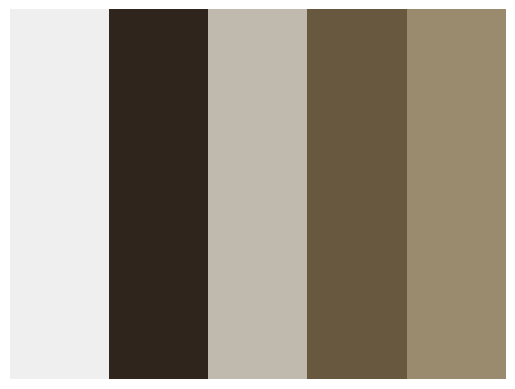

In [54]:
PaletteGeneration(impressionsim)

**SURREALISM**

In [55]:
Surrealism_url = "https://www.wikiart.org/en/paintings-by-style/surrealism?select=featured#!#filterName:featured,viewType:masonry"
Surrealism = "C:/Users/arhar/OneDrive/Desktop/project_img/SURREALISM"
imagestyle="SURREALISM"
x_path = "/html/body/div[2]/div[1]/section/main/div[4]/div/div/div[2]/a"
Surrealism_image_urls = []
dfsur=pd.DataFrame()

In [56]:
Surrealism_image_urls,dfsur = WebScraping(Surrealism_url,imagestyle,x_path)
dfsur.shape

(1620, 5)

In [57]:
SaveItems(Surrealism, Surrealism_image_urls, Surrealism_url,imagestyle)

C:\Users\arhar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



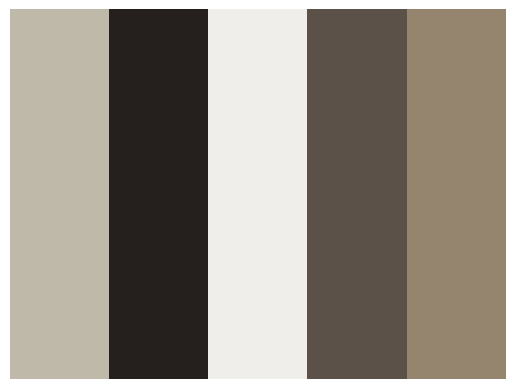

In [58]:
PaletteGeneration(Surrealism)

**CUBISM**

In [62]:
cubism_url = "https://www.wikiart.org/en/paintings-by-style/cubism?select=featured#!#filterName:featured,viewType:masonry"
cubism = "C:/Users/arhar/OneDrive/Desktop/project_img/CUBISM"
x_path = '/html/body/div[2]/div[1]/section/main/div[4]/div/div/div[2]/a'
cubism_image_urls = []
imagestyle="CUBISM"
dfcube=pd.DataFrame()

In [71]:
cubism_image_urls,dfcube = WebScraping(cubism_url,imagestyle,x_path)
dfcube.shape

(1620, 5)

In [ ]:
SaveItems(cubism,cubism_image_urls,cubism_url,imagestyle)

C:\Users\arhar\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


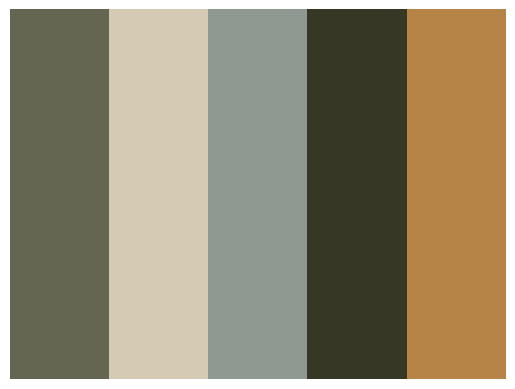

In [ ]:
PaletteGeneration(cubism)

**DataSet Visulaization**

In [72]:
dataframes = [dfimp, dfsur, dfcube]
vizz_df = pd.concat(dataframes)
downloads_folder = os.path.join(os.path.expanduser('~'), 'Downloads')
vizz_df.to_csv(os.path.join(downloads_folder, 'data.csv'))

In [73]:
df = vizz_df

# Visualizations using Plotly Express
fig1 = px.histogram(df, x="Artist", title="Artists and Their Works")
fig2 = px.scatter(df, x="Year", y="Artist", color="Style", title="Artwork Timeline")
#fig3 = px.bar(df['Artist'].value_counts().reset_index(), x='index', y='Artist', labels={'index':'Artist', 'Artist':'Artwork Count'}, title='Artwork Count per Artist')
fig4 = px.pie(df, names='Style', title='Artwork Style Distribution')
fig5 = px.scatter(df, x='Year', y='Artist', color='Style', title='Artwork Timeline', hover_data=['Artwork Name'])
heatmap_data = df.groupby(['Artist', 'Year']).size().reset_index(name='Count')
fig6 = px.imshow(pd.pivot_table(heatmap_data, values='Count', index='Artist', columns='Year').fillna(0), title='Artists vs. Year Heatmap')
fig7 = px.treemap(df, path=['Artist', 'Style'], title='Artists and Styles')

# Layout for the dashboard
dashboard_layout = [
    [fig1, fig2],
    [fig4],
    [fig5, fig6],
    [fig7]
]

# Display the dashboard
for row in dashboard_layout:
    for fig in row:
        if fig:
            fig.show()


**PREPROCESSING**

In [74]:
def PreProcessing1(input_dir, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List all files in the input directory
    image_files = os.listdir(input_dir)
    
    for file_name in image_files:
        # Read each image from the input directory
        image_path = os.path.join(input_dir, file_name)
        img = cv2.imread(image_path)
        
        # Check if the file is an image
        if img is not None:
            # Apply sharpening filter
            sharpened = cv2.filter2D(img, -1, 
                kernel =  np.array([[-1, -1, -1],
                                    [-1,  9, -1],
                                    [-1, -1, -1]]))
            
            # Save the sharpened image to the output directory
            output_path = os.path.join(output_dir, file_name)
            cv2.imwrite(output_path, sharpened)
            print(f"Saved {output_path}")
        else:
            print(f"Skipping {file_name} as it's not an image")



In [75]:
def PreProcessing2(input_dir, output_dir, kernel_size=(5, 5), sigmaX=0):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List all files in the input directory
    image_files = os.listdir(input_dir)
    
    for file_name in image_files:
        # Read each image from the input directory
        image_path = os.path.join(input_dir, file_name)
        img = cv2.imread(image_path)
        
        # Check if the file is an image
        if img is not None:
            # Apply Gaussian blur
            blurred = cv2.GaussianBlur(img, kernel_size, sigmaX)
            
            # Save the blurred image to the output directory
            output_path = os.path.join(output_dir, file_name)
            cv2.imwrite(output_path, blurred)
            print(f"Saved {output_path}")
        else:
            print(f"Skipping {file_name} as it's not an image")


In [76]:
#PREPROCESSING #1
save_imp= "C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM"
save_surr="C:/Users/arhar/OneDrive/Desktop/pre_process1/SURREALISM"
save_cube="C:/Users/arhar/OneDrive/Desktop/pre_process1/CUBISM"

PreProcessing1(impressionsim,save_imp)
PreProcessing1(Surrealism,save_surr)
PreProcessing1(cubism,save_cube)

Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_0.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_10.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_100.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1000.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1001.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1002.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1003.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1004.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1005.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process1/IMPRESSIONISM\IMPRESSIONISM_1006.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre

In [77]:
#PREPROCESSING #2
save_imp= "C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM"
save_surr="C:/Users/arhar/OneDrive/Desktop/pre_process2/SURREALISM"
save_cube="C:/Users/arhar/OneDrive/Desktop/pre_process2/CUBISM"

PreProcessing2(impressionsim,save_imp)
PreProcessing2(Surrealism,save_surr)
PreProcessing2(cubism,save_cube)

Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_0.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_10.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_100.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1000.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1001.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1002.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1003.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1004.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1005.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre_process2/IMPRESSIONISM\IMPRESSIONISM_1006.jpg
Saved C:/Users/arhar/OneDrive/Desktop/pre

**Creating Dataframes For Original, PreProcess1, PreProcess2 Images**

In [2]:
def load_images_from_folder(path):
    data = {'style': [], 'image_array': []}

    for foldername in os.listdir(path):
        folderpath = os.path.join(path, foldername)
        if os.path.isdir(folderpath):
            for filename in os.listdir(folderpath):
                file_path = os.path.join(folderpath, filename)
                if filename.endswith(('.jpg', '.png')):
                    try:
                        img = Image.open(file_path)
                        img_array = np.array(img)  # Convert image to array
                        data['style'].append(foldername)
                        data['image_array'].append(img_array)
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")

    df = pd.DataFrame(data)
    return df

In [3]:
path_original = 'C:/Users/arhar/OneDrive/Desktop/project_img'
path_pre1= 'C:/Users/arhar/OneDrive/Desktop/pre_process1'
path_pre2= 'C:/Users/arhar/OneDrive/Desktop/pre_process2'

df = load_images_from_folder(path_original)
df_pre1= load_images_from_folder(path_pre1)
df_pre2= load_images_from_folder(path_pre2)


In [4]:
accuracy_vizz = []
precision_vizz = []

**DL MODEL CNN usiing VVGN16**

In [84]:
def evaluate_classification_metrics_vgg16(model, X_test, y_test, encoder):
    # Predict classes for test set
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Compute accuracy
    accuracy = np.mean(y_true == y_pred)
    print(f"Accuracy: {accuracy}")
    accuracy_vizz.append(accuracy)
    

    # Compute precision
    precision = precision_score(y_true, y_pred, average='weighted')
    print(f"Precision: {precision}")
    precision_vizz.append(precision)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = encoder.classes_
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix[i, j], 'd'), ha='center', va='center', color='white' if conf_matrix[i, j] > len(y_true)//2 else 'black')

    plt.tight_layout()
    plt.show()

In [85]:
def train_cnn_on_image_dataframe_vgg16(image_dataframe):
    images = np.array(image_dataframe['image_array'].to_list())
    styles = np.array(image_dataframe['style'])

    # Encoding the styles (target variable)
    encoder = LabelEncoder()
    styles_encoded = encoder.fit_transform(styles)
    styles = np.eye(len(encoder.classes_))[styles_encoded]  # Convert to one-hot encoding

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, styles, test_size=0.2, random_state=42)

    # Load pre-trained VGG16 model (without including fully connected layers)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=X_train.shape[1:])

    # Freeze the layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification layers
    x = Flatten()(base_model.output)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(len(encoder.classes_), activation='softmax')(x)

    # Create a new model combining the VGG16 base and custom classification layers
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Evaluate metrics
    evaluate_classification_metrics_vgg16(model, X_test, y_test, encoder)

    return model, encoder







Epoch 1/10


118/118 [==============================] - 64s 537ms/step - loss: 6.0642 - accuracy: 0.6699 - val_loss: 0.9848 - val_accuracy: 0.7535
Epoch 2/10
118/118 [==============================] - 61s 519ms/step - loss: 0.6116 - accuracy: 0.8094 - val_loss: 0.6877 - val_accuracy: 0.7662
Epoch 3/10
118/118 [==============================] - 60s 511ms/step - loss: 0.3538 - accuracy: 0.8567 - val_loss: 0.7083 - val_accuracy: 0.7620
Epoch 4/10
118/118 [==============================] - 61s 521ms/step - loss: 0.2847 - accuracy: 0.8830 - val_loss: 0.6766 - val_accuracy: 0.7747
Epoch 5/10
118/118 [==============================] - 61s 521ms/step - loss: 0.2459 - accuracy: 0.9030 - val_loss: 0.8256 - val_accuracy: 0.7821
Epoch 6/10
118/118 [==============================] - 61s 521ms/step - loss: 0.2221 - accuracy: 0.9086 - val_loss: 0.7744 - val_accuracy: 0.7811
Epoch 7/10
118/118 [==============================] - 61s 516ms/step - loss: 0.2105 - accuracy: 0.9184 - val_loss: 0.7721 - v

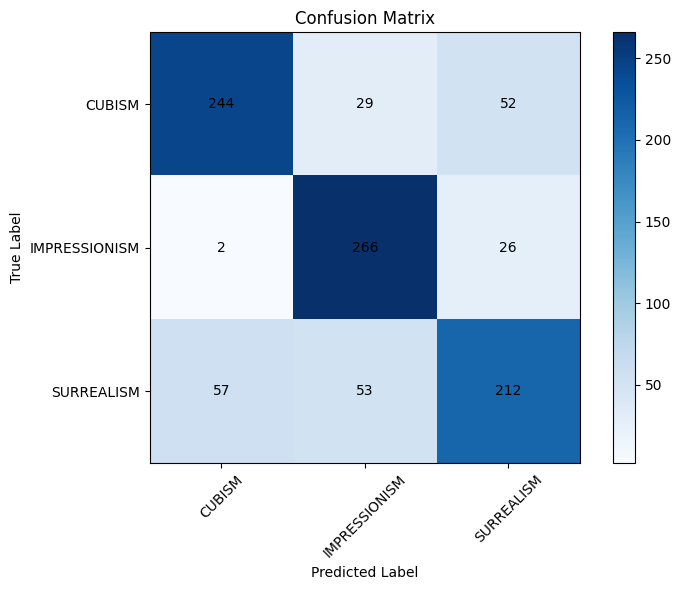

In [86]:
trained_cnn_vgg16, label_encoder_vgg16 = train_cnn_on_image_dataframe_vgg16(df)

Epoch 1/10
118/118 [==============================] - 65s 544ms/step - loss: 6.7279 - accuracy: 0.6369 - val_loss: 0.8683 - val_accuracy: 0.6897
Epoch 2/10
118/118 [==============================] - 62s 522ms/step - loss: 0.6977 - accuracy: 0.7435 - val_loss: 0.7276 - val_accuracy: 0.7152
Epoch 3/10
118/118 [==============================] - 61s 514ms/step - loss: 0.5126 - accuracy: 0.7858 - val_loss: 0.7408 - val_accuracy: 0.7078
Epoch 4/10
118/118 [==============================] - 60s 511ms/step - loss: 0.4357 - accuracy: 0.8131 - val_loss: 0.7941 - val_accuracy: 0.7290
Epoch 5/10
118/118 [==============================] - 60s 509ms/step - loss: 0.3737 - accuracy: 0.8357 - val_loss: 0.8196 - val_accuracy: 0.7279
Epoch 6/10
118/118 [==============================] - 60s 509ms/step - loss: 0.3656 - accuracy: 0.8424 - val_loss: 0.8415 - val_accuracy: 0.7216
Epoch 7/10
118/118 [==============================] - 60s 510ms/step - loss: 0.3450 - accuracy: 0.8493 - val_loss: 0.9498 - val_ac

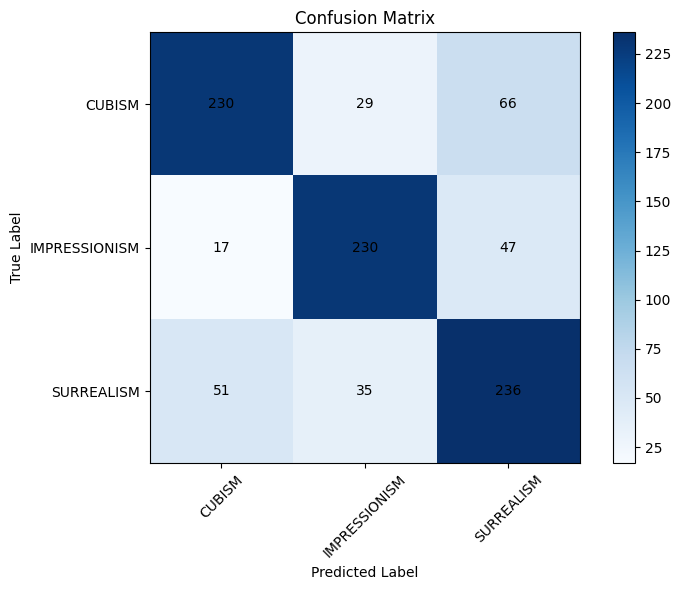

In [95]:
trained_cnn_vgg16, label_encoder_vgg16 = train_cnn_on_image_dataframe_vgg16(df_pre1)

Epoch 1/10
118/118 [==============================] - 60s 503ms/step - loss: 3.9654 - accuracy: 0.6281 - val_loss: 0.7492 - val_accuracy: 0.7120
Epoch 2/10
118/118 [==============================] - 58s 495ms/step - loss: 0.5252 - accuracy: 0.7980 - val_loss: 0.7440 - val_accuracy: 0.7152
Epoch 3/10
118/118 [==============================] - 57s 487ms/step - loss: 0.3756 - accuracy: 0.8424 - val_loss: 0.7048 - val_accuracy: 0.7545
Epoch 4/10
118/118 [==============================] - 58s 495ms/step - loss: 0.2997 - accuracy: 0.8791 - val_loss: 0.7551 - val_accuracy: 0.7535
Epoch 5/10
118/118 [==============================] - 59s 499ms/step - loss: 0.2888 - accuracy: 0.8775 - val_loss: 0.8160 - val_accuracy: 0.7375
Epoch 6/10
118/118 [==============================] - 58s 488ms/step - loss: 0.2523 - accuracy: 0.8926 - val_loss: 0.8222 - val_accuracy: 0.7630
Epoch 7/10
118/118 [==============================] - 58s 491ms/step - loss: 0.2132 - accuracy: 0.9062 - val_loss: 0.8563 - val_ac

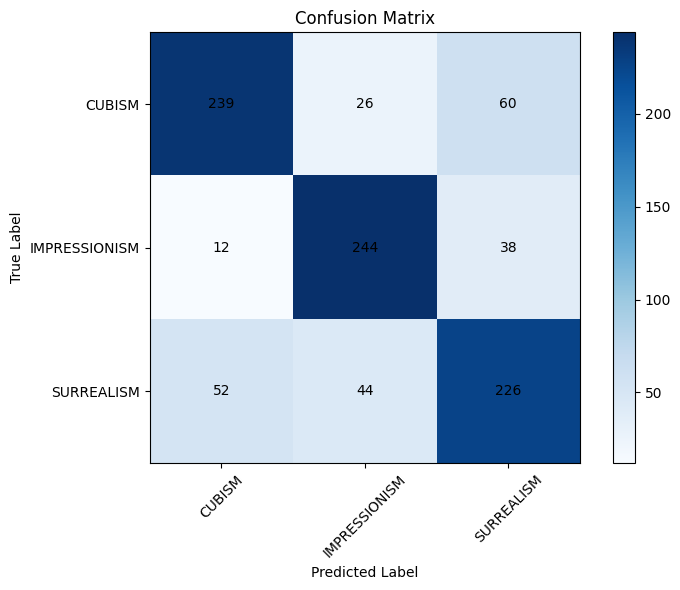

In [96]:
trained_cnn_vgg16, label_encoder_vgg16 = train_cnn_on_image_dataframe_vgg16(df_pre2)

**ML MODEL USING SVM**

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_metrics_svm(svm_model, X_test, y_test, label_encoder):
    # Predict classes for test set
    y_pred = svm_model.predict(X_test)
    
    # Decode labels
    classes = label_encoder.classes_
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    accuracy_vizz.append(accuracy)

    # Compute precision
    precision = precision_score(y_test, y_pred, average='weighted')
    print(f"Precision: {precision}")
    precision_vizz.append(precision)
    # Display confusion matrix
    plot_confusion_matrix(y_test_decoded, y_pred_decoded, classes)


In [10]:
def train_svm_on_image_data(df):
    images = np.array(df['image_array'].to_list())
    styles = np.array(df['style'])

    # Encoding the styles (target variable)
    encoder = LabelEncoder()
    styles_encoded = encoder.fit_transform(styles)

    # Flatten and normalize the image data
    num_images, height, width, channels = images.shape
    flattened_images = images.reshape(num_images, -1) / 255.0  # Normalize pixel values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(flattened_images, styles_encoded, test_size=0.2, random_state=42)

    # Train SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)  # You can adjust the kernel and C parameter
    svm_classifier.fit(X_train, y_train)

    # Evaluate the classifier
    evaluate_classification_metrics_svm(svm_classifier, X_test, y_test,encoder)

    return svm_classifier, encoder


In [5]:
df=df.sample(1000)
df_pre1=df_pre1.sample(1000)
df_pre2=df_pre2.sample(1000)

Accuracy: 0.45
Precision: 0.44721586630894855


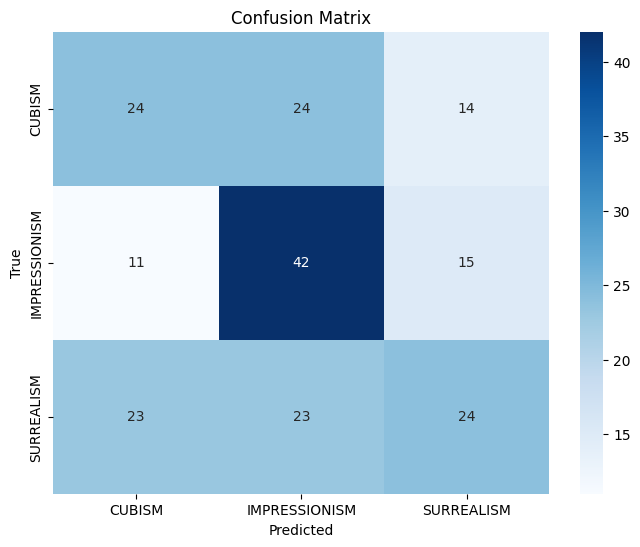

In [11]:
trained_svm, label_encoder = train_svm_on_image_data(df)

Accuracy: 0.405
Precision: 0.39873767752715117


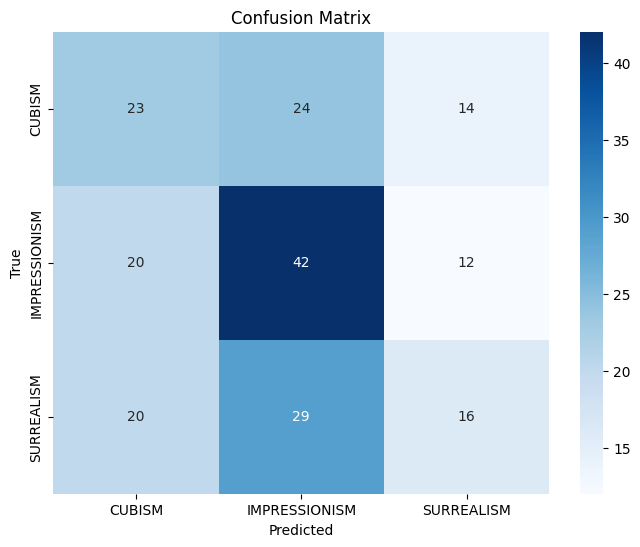

In [12]:
trained_svm, label_encoder = train_svm_on_image_data(df_pre1)

Accuracy: 0.44
Precision: 0.4358629355356601


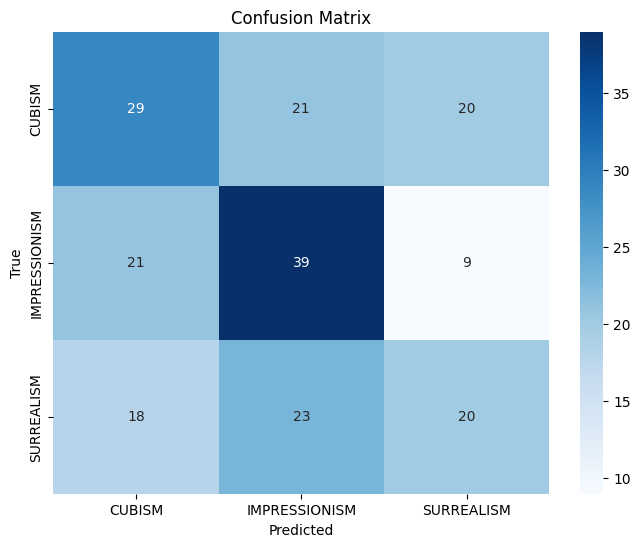

In [13]:
trained_svm, label_encoder = train_svm_on_image_data(df_pre2)

**Comparison**

In [ ]:
accuracy_vizz.append(0.767268862911796)
precision_vizz.append(0.7670918310270691)

accuracy_vizz.append(0.7396386822529224)
precision_vizz.append(0.742381558467945)

accuracy_vizz.append(0.7534537725823592)
precision_vizz.append(0.7538965699375675)

In [20]:
data = {
    'Model': models,
    'Accuracy':  accuracy_vizz,
    'Precision': precision_vizz
}

# Create DataFrame from the data
df = pd.DataFrame(data)

# Creating bar charts using Plotly
fig = px.bar(df, x='Model', y='Precision', text='Precision', title='Model Comparison: Precision Of Models')
fig1 = px.bar(df, x='Model', y='Accuracy', text='Accuracy', title='Model Comparison: Accuracy Of Models')

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig1.update_traces(texttemplate='%{text:.3f}', textposition='outside')

fig.update_layout(xaxis_title='Models', yaxis_title='Precision')
fig1.update_layout(xaxis_title='Models', yaxis_title='Accuracy')

fig.show()
fig1.show()
